# Challenge Accepted

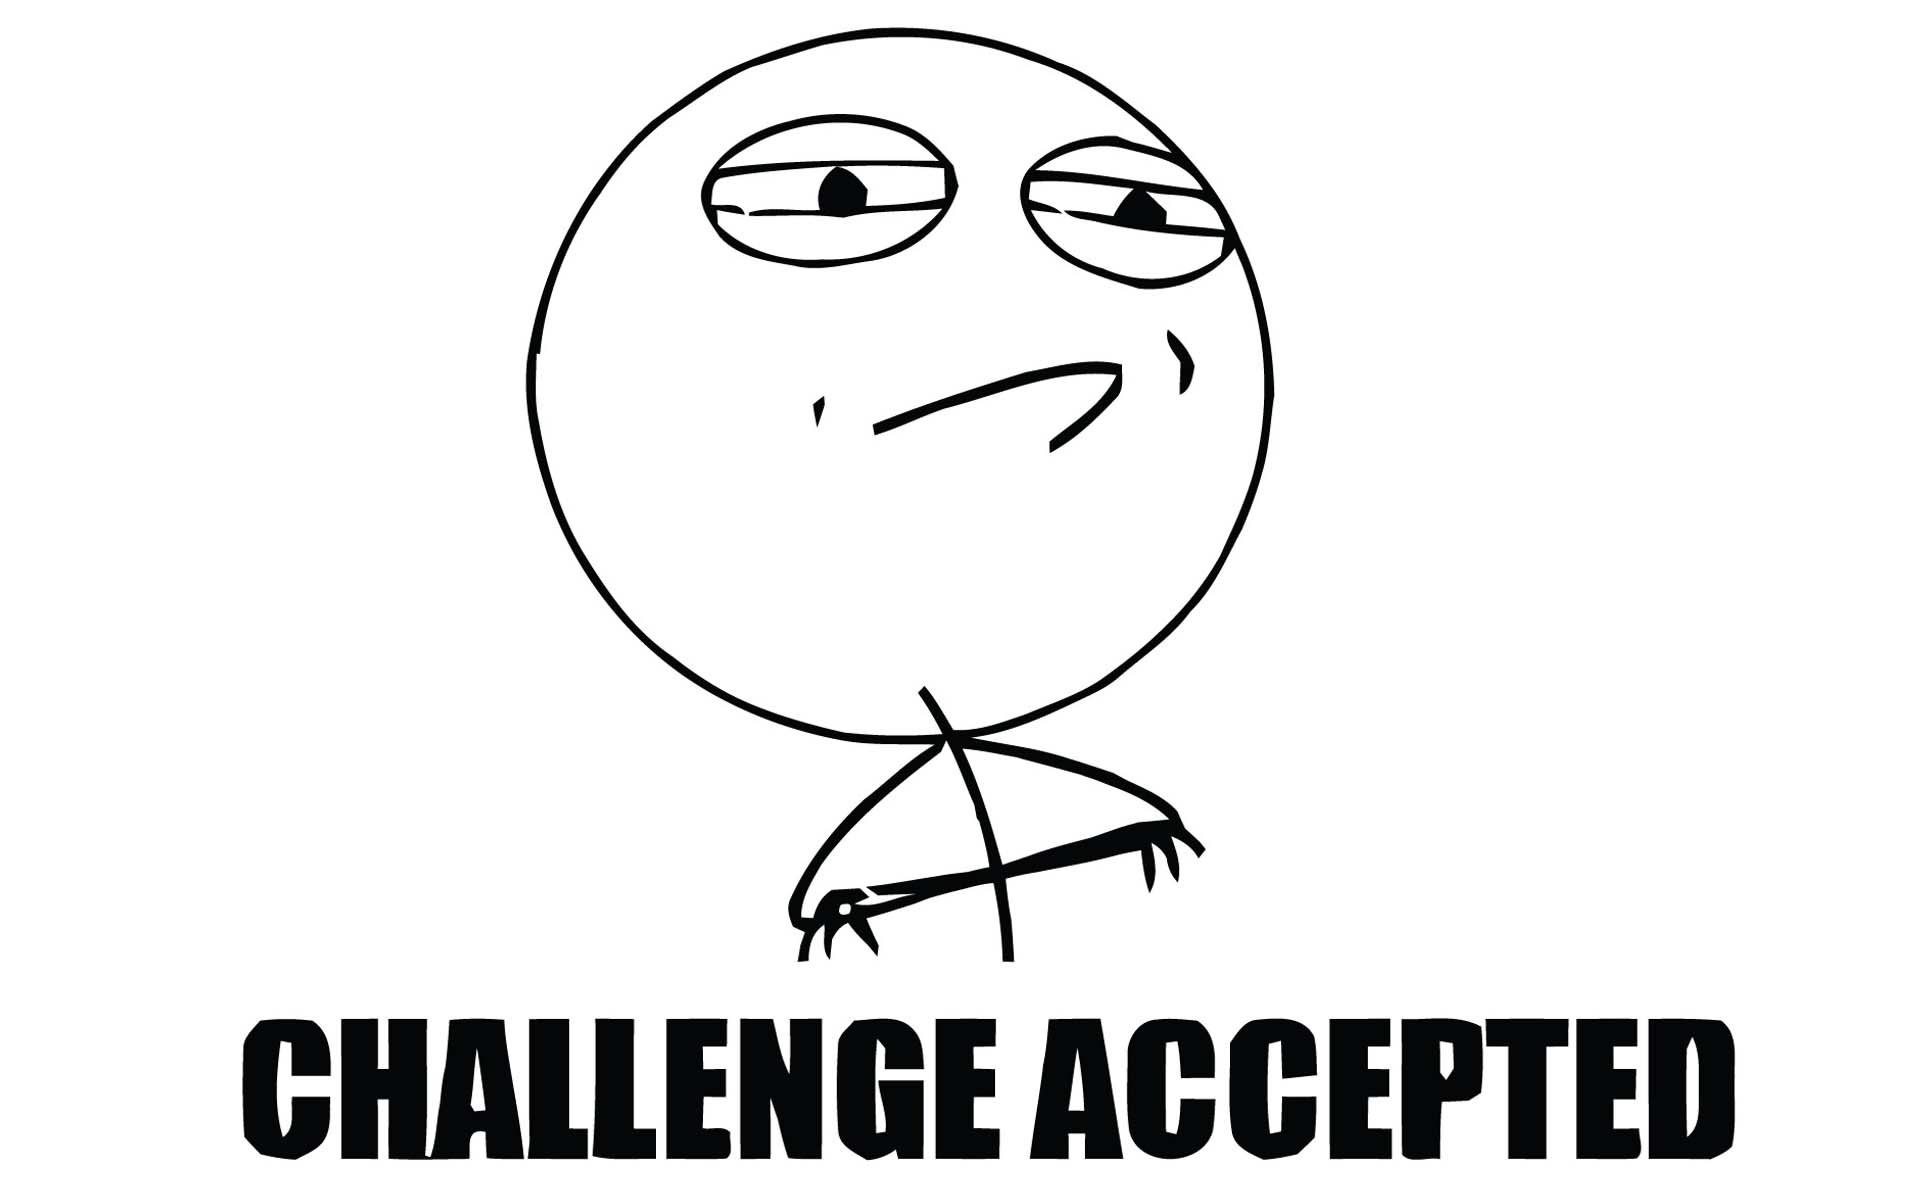

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
pip install citipy

     |████████████████████████████████| 563kB 533kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=56387092bcfc7b44cac6c9d17c3a94fd46f63cd4226f3023437550360b6db44d
  Stored in directory: /Users/jtst/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
cities

['butaritari',
 'port hardy',
 'taolanaro',
 'saskylakh',
 'busselton',
 'souillac',
 'upernavik',
 'georgetown',
 'wolmaranstad',
 'hofn',
 'cap-aux-meules',
 'bethel',
 'punta arenas',
 'cape town',
 'dikson',
 'mataura',
 'bredasdorp',
 'esna',
 'huntington',
 'derzhavinsk',
 'ancud',
 'bluff',
 'bambous virieux',
 'mys shmidta',
 'tasiilaq',
 'isiolo',
 'cabo san lucas',
 'beloha',
 'port alfred',
 'grand river south east',
 'castro',
 'tsihombe',
 'jimenez',
 'naantali',
 'rikitea',
 'ushuaia',
 'tupik',
 'aykhal',
 'ardrishaig',
 'khatanga',
 'carnarvon',
 'freeport',
 'goderich',
 'zhengjiatun',
 'hegra',
 'tubruq',
 'honningsvag',
 'hualmay',
 'new norfolk',
 'fairlie',
 'rawannawi',
 'yellowknife',
 'vaini',
 'nanortalik',
 'isangel',
 'leningradskiy',
 'lata',
 'mehamn',
 'abbeville',
 'puerto ayora',
 'kyra',
 'quba',
 'meulaboh',
 'pisco',
 'lenger',
 'provideniya',
 'atuona',
 'kodiak',
 'cockburn town',
 'morgan city',
 'mahebourg',
 'laibin',
 'albany',
 'araouane',
 'sa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
long=[]
temp=[]
wind=[]

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

print('Beginning Data Retrieval')
print('-------------------------')

for city in cities:
    try:
        current_city = city
        query_url = url +'appid='+ weather_api_key + '&q=' + current_city + '&units=' + units
        db = requests.get(query_url).json()
        city_name.append(db['name'])
        cloudiness.append(db['clouds']['all'])
        country.append(db['sys']['country'])
        date.append(db['dt'])
        humidity.append(db['main']['humidity'])
        lat.append(db['coord']['lat'])
        long.append(db['coord']['lon'])
        temp.append(db['main']['temp_max'])
        wind.append(db['wind']['speed'])
        print(f'processing record {len(city_name)}| {current_city}')
        
    except:
        print(f'{current_city} not found, skipping')


Beginning Data Retrieval
-------------------------
processing record 1| butaritari
processing record 2| port hardy
taolanaro not found, skipping
processing record 3| saskylakh
processing record 4| busselton
processing record 5| souillac
processing record 6| upernavik
processing record 7| georgetown
wolmaranstad not found, skipping
processing record 8| hofn
processing record 9| cap-aux-meules
processing record 10| bethel
processing record 11| punta arenas
processing record 12| cape town
processing record 13| dikson
processing record 14| mataura
processing record 15| bredasdorp
processing record 16| esna
processing record 17| huntington
processing record 18| derzhavinsk
processing record 19| ancud
processing record 20| bluff
processing record 21| bambous virieux
mys shmidta not found, skipping
processing record 22| tasiilaq
processing record 23| isiolo
processing record 24| cabo san lucas
processing record 25| beloha
processing record 26| port alfred
grand river south east not found, ski

processing record 238| haines junction
processing record 239| coihaique
processing record 240| iqaluit
processing record 241| bengkulu
processing record 242| bam
processing record 243| bilibino
processing record 244| sioux falls
processing record 245| le port
processing record 246| omaruru
processing record 247| puro
processing record 248| kahului
processing record 249| grindavik
processing record 250| watsa
processing record 251| marienburg
processing record 252| voh
processing record 253| saint anthony
processing record 254| tarko-sale
processing record 255| sibot
processing record 256| templin
processing record 257| daru
processing record 258| barrow
processing record 259| puerto leguizamo
processing record 260| vilcun
processing record 261| houston
processing record 262| altay
processing record 263| nome
processing record 264| tezu
processing record 265| charters towers
vaitupu not found, skipping
processing record 266| vardo
processing record 267| akyab
processing record 268| phal

processing record 473| bonavista
processing record 474| peniche
processing record 475| sisimiut
processing record 476| porto velho
processing record 477| singaparna
cazaje not found, skipping
processing record 478| saint-joseph
processing record 479| oudtshoorn
processing record 480| pitimbu
processing record 481| narsaq
processing record 482| dunedin
processing record 483| sinjar
processing record 484| tank
processing record 485| mancio lima
processing record 486| zlotow
processing record 487| kasongo-lunda
processing record 488| sioux lookout
processing record 489| nuuk
processing record 490| dasoguz
processing record 491| zemio
processing record 492| naze
processing record 493| waterfoot
processing record 494| boguchany
louisbourg not found, skipping
processing record 495| tilichiki
processing record 496| veraval
processing record 497| chute-aux-outardes
processing record 498| waingapu
processing record 499| naini tal
processing record 500| dzialdowo
processing record 501| san patri

In [5]:
len(city_name)

575

In [6]:
bd = pd.DataFrame({
    
    'City':city_name,
    'Cloudiness':cloudiness,
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Lat':lat,
    'Long':long,
    'Max Temp':temp,
    'Wind Speed':wind
    
    
})

bd

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Butaritari,99,KI,1588632312,82,3.07,172.79,28.20,7.04
1,Port Hardy,90,CA,1588632312,62,50.70,-127.42,12.00,10.30
2,Saskylakh,100,RU,1588632313,94,71.92,114.08,-13.42,5.28
3,Busselton,99,AU,1588632313,74,-33.65,115.33,13.33,6.41
4,Souillac,20,MU,1588632313,78,-20.52,57.52,24.00,2.60
...,...,...,...,...,...,...,...,...,...
570,Ushtobe,72,KZ,1588632503,36,45.25,77.98,11.36,10.03
571,Mayumba,100,GA,1588632503,89,-3.43,10.66,26.07,1.04
572,Ongandjera,0,NA,1588632503,19,-17.88,15.07,21.72,2.17
573,Launceston,90,AU,1588632503,93,-41.45,147.17,8.33,0.94


In [7]:
new_date=[]

for index,row in bd.iterrows():
    n = pd.Timestamp(row['Date'], unit='s')
    new_date.append(n)



In [8]:
bd['New_date'] =new_date

In [9]:
bd.drop(['Date'],axis=1)

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed,New_date
0,Butaritari,99,KI,82,3.07,172.79,28.20,7.04,2020-05-04 22:45:12
1,Port Hardy,90,CA,62,50.70,-127.42,12.00,10.30,2020-05-04 22:45:12
2,Saskylakh,100,RU,94,71.92,114.08,-13.42,5.28,2020-05-04 22:45:13
3,Busselton,99,AU,74,-33.65,115.33,13.33,6.41,2020-05-04 22:45:13
4,Souillac,20,MU,78,-20.52,57.52,24.00,2.60,2020-05-04 22:45:13
...,...,...,...,...,...,...,...,...,...
570,Ushtobe,72,KZ,36,45.25,77.98,11.36,10.03,2020-05-04 22:48:23
571,Mayumba,100,GA,89,-3.43,10.66,26.07,1.04,2020-05-04 22:48:23
572,Ongandjera,0,NA,19,-17.88,15.07,21.72,2.17,2020-05-04 22:48:23
573,Launceston,90,AU,93,-41.45,147.17,8.33,0.94,2020-05-04 22:48:23


In [10]:
bd.to_csv('country_data.csv')

In [11]:
bd.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Long          575
Max Temp      575
Wind Speed    575
New_date      575
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

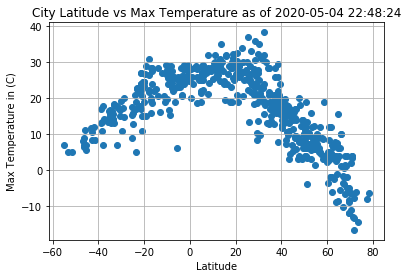

In [78]:
x=bd['Lat']
y=bd['Max Temp']
z=max(bd['New_date'])

plt.scatter(x,y)
plt.title(f'City Latitude vs Max Temperature as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in (C)')
plt.grid()
plt.savefig('Latitude vs Temperature.png')

#### There seems to be a correlation here however it is split and has a breaking point. It is necessary to segment the data in order to analyze further however as of now it is quite clear that as we aproach latitude 0 temperature rises. The breaking point however does not match exactly latitude 0, in fact we may see higher temperatures in higher latitudes, the decrease is not clear until further ahead so there should be other factors in play here.

#### Latitude vs. Humidity Plot

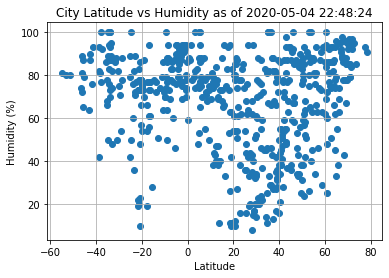

In [79]:
x=bd['Lat']
y=bd['Humidity']
z=max(bd['New_date'])

plt.scatter(x,y)
plt.title(f'City Latitude vs Humidity as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Latitude vs Humidity.png')

#### There is no correlation visible between this two variables, any % of humidity can happen for any given latitude apparently. We could say there is higher humidity arround lat 0 however, anything seems to go for higher (negative or positive) latitudes.

#### Latitude vs. Cloudiness Plot

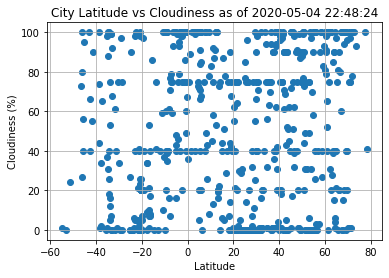

In [80]:
x=bd['Lat']
y=bd['Cloudiness']
z=max(bd['New_date'])

plt.scatter(x,y)
plt.title(f'City Latitude vs Cloudiness as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Latitude vs Cloudiness.png')

#### There is no correlation here any % of Cloudiness can happen for any given lat point.

#### Latitude vs. Wind Speed Plot

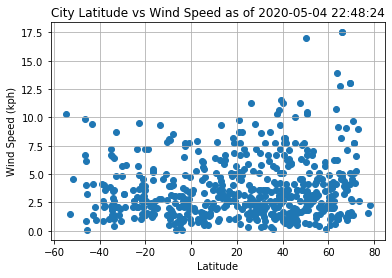

In [81]:
x=bd['Lat']
y=bd['Wind Speed']
z=max(bd['New_date'])

plt.scatter(x,y)
plt.title(f'City Latitude vs Wind Speed as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.grid()
plt.savefig('Latitude vs Wind Speed.png')

#### There is a really slight tendency of wind being faster for higher (positive) latitude points however this point is very very wild and could be outlier-driver which could bias the statement.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [22]:
# Create Northern and Southern Hemisphere DataFrames
bd_north = bd.loc[(bd['Lat']>=0)]
bd_south = bd.loc[(bd['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r squared is: 0.7552181207414642
correlation coefficient is -0.87


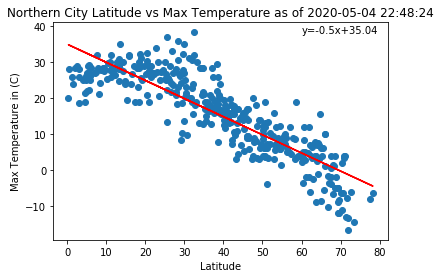

In [82]:
import scipy.stats as st

x=bd_north['Lat']
y=bd_north['Max Temp']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Northern City Latitude vs Max Temperature as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in (C)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(60,38))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('North - Latitude vs Temperature.png')

#### There is a clear negative correlation here, altough not perfect. This is a clear indication that latitude is indeed conected to temperature however, by explaining 75% of it variation, however there are some cases that do not follow this trend and fall in the 25% unexplained by latitude, there should be other factors at play here.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r squared is: 0.6292793030383067
correlation coefficient is 0.79


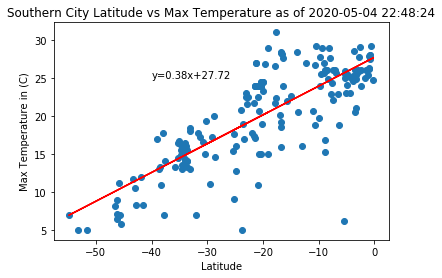

In [83]:
x=bd_south['Lat']
y=bd_south['Max Temp']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Southern City Latitude vs Max Temperature as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in (C)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(-40,25))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('South - Latitude vs Temperature.png')

#### There is also a clear correlation for south hemisphere, however less strong when compared to the north. As I was explaining there are other factors at play that explain changes in temperaturo, for the south these amount to 38%. As it happens, there is more water mass in the south side of the globe this also plays a crucial factor for regulating temperature, perhaps this explains why the correlation is weaker here.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r squared is: 0.03806892176741001
correlation coefficient is 0.2


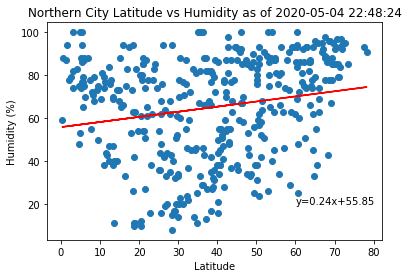

In [84]:
x=bd_north['Lat']
y=bd_north['Humidity']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Northern City Latitude vs Humidity as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(60,20))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('North - Latitude vs Humidity.png')

#### There is no correlation here, any % of humidity can happen for any given latitude apparently, as it turns, latitude only explains 4% aprox of changes in humidity for the norhern part of the globe.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r squared is: 0.0008725263339506297
correlation coefficient is 0.03


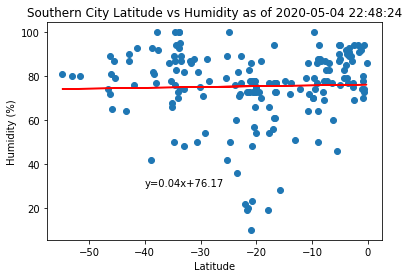

In [85]:
x=bd_south['Lat']
y=bd_south['Humidity']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Southern City Latitude vs Humidity as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(-40,30))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('South - Latitude vs Humidity.png')

#### There is no correlation here, any % of humidity can happen for any given latitude apparently, as it turns, latitude only explains les than 1% of changes in humidity for the southern part of the globe.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r squared is: 0.011131273080034055
correlation coefficient is 0.11


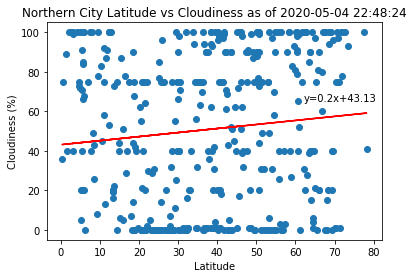

In [86]:
x=bd_north['Lat']
y=bd_north['Cloudiness']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Northern City Latitude vs Cloudiness as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(62,65))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('North - Latitude vs Cloudiness.png')

#### There is no correlation between latitude and Cloudiness for this hemisphere, this fenomenon is explained by latitude changes by aprox 1%

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r squared is: 0.05351453609055864
correlation coefficient is 0.23


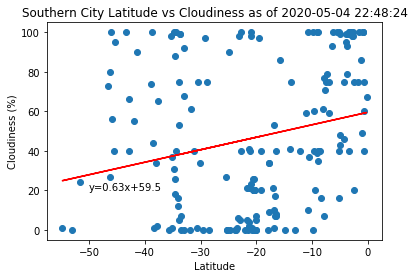

In [87]:
x=bd_south['Lat']
y=bd_south['Cloudiness']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Southern City Latitude vs Cloudiness as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(-50,20))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('South - Latitude vs Cloudiness.png')

#### There is no correlation between latitude and Cloudiness for this hemisphere, this fenomenon is explained by latitude changes by aprox 5%

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r squared is: 0.014508642435422502
correlation coefficient is 0.12


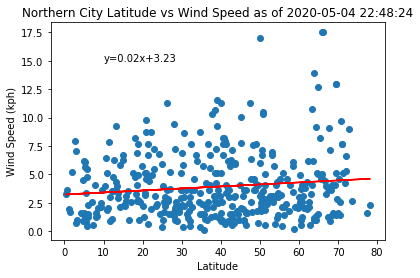

In [88]:
x=bd_north['Lat']
y=bd_north['Wind Speed']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Northern City Latitude vs Wind Speed as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(10,15))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('North - Latitude vs Wind Speed.png')

#### There is no correlation between latitude and Wind Speed for this hemisphere, this fenomenon is explained by latitude changes by aprox 1%

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r squared is: 0.023034488194426904
correlation coefficient is -0.15


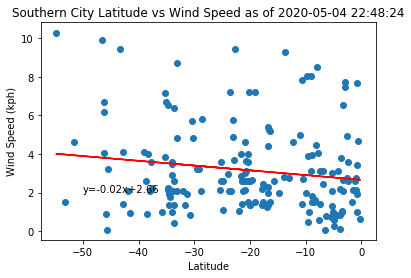

In [89]:
x=bd_south['Lat']
y=bd_south['Wind Speed']
z=max(bd['New_date'])

(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_equation = f'y={round(slope,2)}x+{round(intercept,2)}'
plt.scatter(x,y)
plt.title(f'Southern City Latitude vs Wind Speed as of {z}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.plot(x,regress_values,'r-')
plt.annotate(line_equation,(-50,2))
print(f'the r squared is: {rvalue**2}')
print(f'correlation coefficient is {round(st.pearsonr(x,y)[0],2)}')
plt.savefig('South - Latitude vs Wind Speed.png')

#### There is no correlation between latitude and Wind Speed for this hemisphere, this fenomenon is explained by latitude changes by aprox 2%